In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [60]:
import yfinance as yf

# Specify the ticker symbol and the timeframe
ticker_symbol = "AAPL"
start_date = "2010-01-01"
end_date = "2024-02-26"

df = yf.download(ticker_symbol, start=start_date, end=end_date)
print(df.tail())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-02-16  183.419998  184.850006  181.669998  182.309998  182.309998   
2024-02-20  181.789993  182.429993  180.000000  181.559998  181.559998   
2024-02-21  181.940002  182.889999  180.660004  182.320007  182.320007   
2024-02-22  183.479996  184.960007  182.460007  184.369995  184.369995   
2024-02-23  185.009995  185.039993  182.229996  182.520004  182.520004   

              Volume  
Date                  
2024-02-16  49701400  
2024-02-20  53665600  
2024-02-21  41529700  
2024-02-22  52292200  
2024-02-23  45074500  


In [61]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481929,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367033,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409363,447610800


In [62]:
df=df.drop(['Date','Adj Close'], axis=1)

In [63]:
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


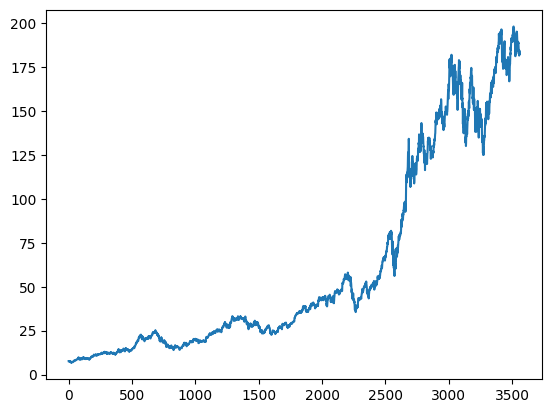

In [64]:
plt.plot(df['Close'])
plt.show()

In [65]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3554    184.9763
3555    185.0723
3556    185.1912
3557    185.3280
3558    185.4411
Name: Close, Length: 3559, dtype: float64

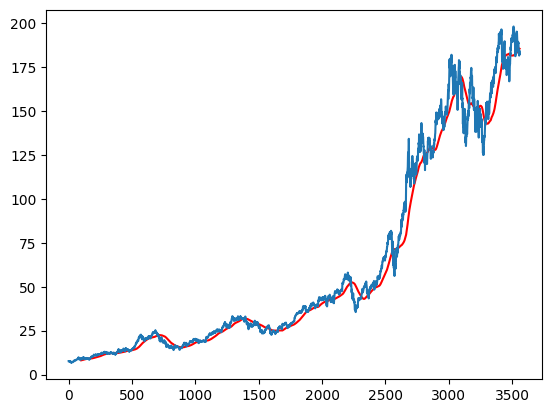

In [66]:
plt.plot(ma100,'r')
plt.plot(df.Close)
plt.show()

In [67]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3554    183.48035
3555    183.55090
3556    183.63355
3557    183.68755
3558    183.73265
Name: Close, Length: 3559, dtype: float64

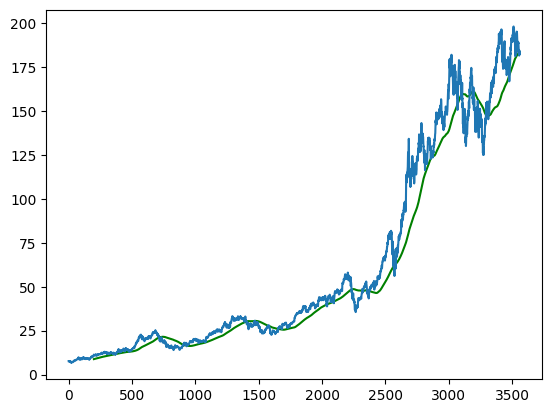

In [68]:
plt.plot(ma200,'g')
plt.plot(df.Close)
plt.show()

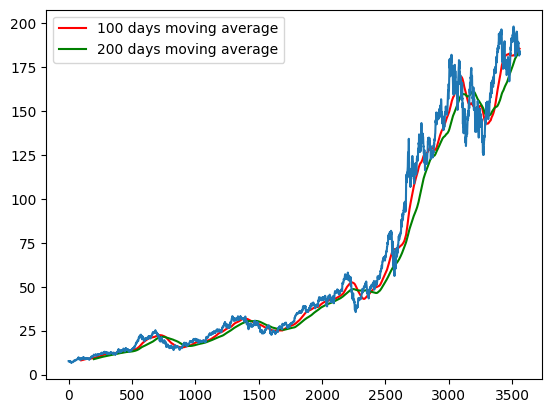

In [69]:
plt.plot(ma100,'r', label='100 days moving average')
plt.plot(ma200,'g', label='200 days moving average')
plt.plot(df.Close)
plt.legend()
plt.show()

In [70]:
df.shape

(3559, 5)

In [71]:
#splitting data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [72]:
data_training.shape

(2491, 1)

In [73]:
data_testing.shape

(1068, 1)

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [75]:
scaler

MinMaxScaler()

In [76]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3554,183.419998,184.850006,181.669998,182.309998,49701400
3555,181.789993,182.429993,180.000000,181.559998,53665600
3556,181.940002,182.889999,180.660004,182.320007,41529700
3557,183.479996,184.960007,182.460007,184.369995,52292200


In [77]:
data_training_array=scaler.fit_transform(data_training)

In [78]:
data_training_array

array([[0.01308973],
       [0.01331028],
       [0.01127768],
       ...,
       [0.9836855 ],
       [0.97876197],
       [0.97780225]])

In [79]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train , y_train=np.array(x_train), np.array(y_train)

In [80]:
#ml model

In [81]:
pip install keras

In [82]:
pip install tensorflow

In [83]:
pip install --upgrade numpy

In [84]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [85]:
model=Sequential()
model.add(LSTM (units= 50,activation='relu', return_sequences=True, 
                input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM (units= 60,activation='relu', return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM (units= 80,activation='relu', return_sequences=True))
model.add(Dropout(0.4))



model.add(LSTM (units= 120,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))

In [86]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 120)              

In [87]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
75/75 [==============================] - 14s 131ms/step - loss: 0.0221
Epoch 2/50
75/75 [==============================] - 11s 142ms/step - loss: 0.0051
Epoch 3/50
75/75 [==============================] - 11s 146ms/step - loss: 0.0047
Epoch 4/50
75/75 [==============================] - 11s 140ms/step - loss: 0.0043
Epoch 5/50
75/75 [==============================] - 10s 138ms/step - loss: 0.0041
Epoch 6/50
75/75 [==============================] - 11s 143ms/step - loss: 0.0039
Epoch 7/50
75/75 [==============================] - 11s 142ms/step - loss: 0.0039
Epoch 8/50
75/75 [==============================] - 11s 143ms/step - loss: 0.0034
Epoch 9/50
75/75 [==============================] - 11s 142ms/step - loss: 0.0035
Epoch 10/50
75/75 [==============================] - 11s 142ms/step - loss: 0.0032
Epoch 11/50
75/75 [==============================] - 10s 138ms/step - loss: 0.0031
Epoch 12/50
75/75 [==============================] - 10s 139ms/step - loss: 0.0029
Epoch 13/50
7

In [88]:
model.save('keras_model.h5')

C:\Users\meenal saini\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [89]:
data_testing.head()

,Close
2491,66.592499
2492,66.072502
2493,66.959999
2494,66.812500
2495,66.040001


In [90]:
past_100_days=data_training.tail(100)

In [91]:
print(type(past_100_days))
print(type(data_testing))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [92]:
print(past_100_days.head())
print(data_testing.head())

          Close
2391  51.057499
2392  50.005001
2393  50.310001
2394  50.807499
2395  50.437500
          Close
2491  66.592499
2492  66.072502
2493  66.959999
2494  66.812500
2495  66.040001


In [93]:
pip install --upgrade pandas

In [103]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [105]:
final_df.head()

,Close
0,51.057499
1,50.005001
2,50.310001
3,50.807499
4,50.437500


In [106]:
input_data=scaler.fit_transform(final_df)

In [108]:
input_data

array([[0.01817726],
       [0.01115007],
       [0.01318646],
       ...,
       [0.89457524],
       [0.90826236],
       [0.89591056]])

In [109]:
input_data.shape

(1168, 1)

In [119]:
x_test=[]
y_test=[]

for i in range (100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [120]:
x_test, y_test=np.array(x_test), np.array(y_test)

In [121]:
x_test.shape

(1068, 100, 1)

In [123]:
y_test.shape

(1068,)

In [124]:
#making predictions

y_predicted=model.predict(x_test)

34/34 [==============================] - 2s 50ms/step


In [125]:
y_predicted.shape

(1068, 1)

In [126]:
y_test

array([0.12189951, 0.11842766, 0.1243532 , ..., 0.89457524, 0.90826236,
       0.89591056])

In [127]:
y_predicted

array([[0.13766308],
       [0.1393609 ],
       [0.14092508],
       ...,
       [0.84246874],
       [0.83787334],
       [0.83361405]], dtype=float32)

In [130]:
scaler.scale_

array([0.00667668])

In [131]:
scale_factor= 1/0.00667668
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

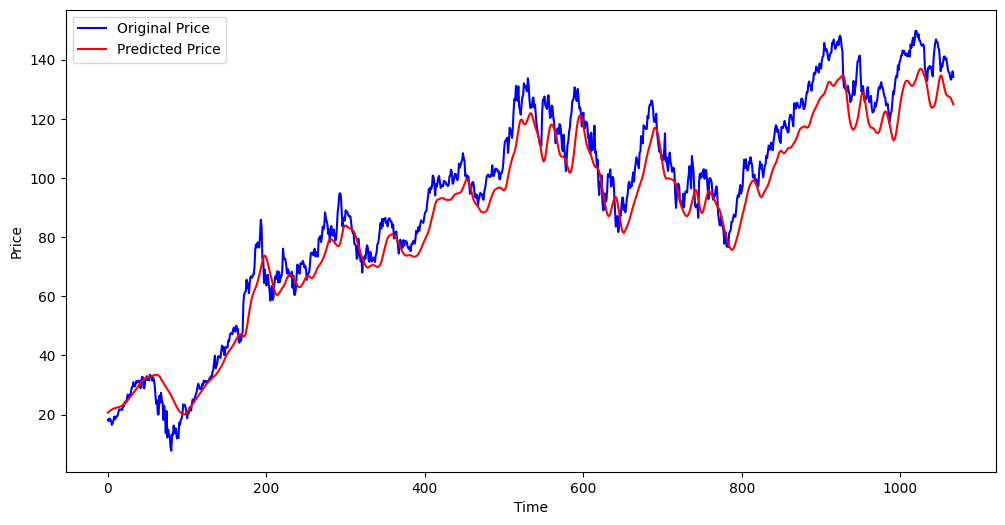

In [133]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()